<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Pandas/Python_intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# permite trasnmitir um arquivo entre dois computadores
!mkdir examples
!wget -O examples/brain_size.csv https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv

mkdir: cannot create directory ‘examples’: File exists
--2022-04-26 19:53:31--  https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1801 (1.8K) [text/plain]
Saving to: ‘examples/brain_size.csv’

examples/brain_size 100%[===================>]   1.76K  --.-KB/s    in 0s      

2022-04-26 19:53:31 (14.9 MB/s) - ‘examples/brain_size.csv’ saved [1801/1801]



In [159]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")

In [160]:
data.shape

(40, 8)

In [161]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [162]:
data['Gender']

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [163]:
#Seleção de valores
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [164]:
pd.DataFrame.describe(data)

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [165]:
# Group by, criando uma view
groupby_gender = data.groupby('Gender')
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [166]:
# Qual é o valor médio de VIQ para toda a população?
print("O valor médio de VIQ para toda a população é", data['VIQ'].mean())

#Quantos homens/ mulheres foram incluidos neste estudo?
print("Foram incluidos:\n", groupby_gender.count()['Unnamed: 0'])

#Qual é o valor médio das contagens de MRI, para homens e para mulheres
print("Os valores médios das contagens de MRI para cada genero são:\n", groupby_gender.mean()['MRI_Count'])

O valor médio de VIQ para toda a população é 112.35
Foram incluidos:
 Gender
Female    20
Male      20
Name: Unnamed: 0, dtype: int64
Os valores médios das contagens de MRI para cada genero são:
 Gender
Female    862654.6
Male      954855.4
Name: MRI_Count, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6b0519890>,
      dtype=object)

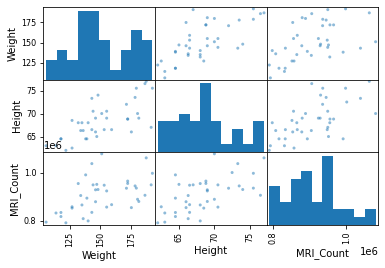

In [167]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Weight','Height', 'MRI_Count']])

In [168]:
# Tamanho da amostra
# Testando o tamanho da amostra: Teste de Hipótese
from scipy import stats
# Testa se a média populacional tem um determinado valor
print(stats.ttest_1samp(data['VIQ'], 0))
# Com um valor de p_value com uma ordem de 10^-28 temos que a média não é 0

print(stats.ttest_1samp(data['VIQ'], 110))

# em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)
Ttest_1sampResult(statistic=0.6293461053092635, pvalue=0.5327920500038907)


In [169]:
# Para testar se é significativo a diferença entre a média masculina e feminina
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)  

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

## Classificação de plantas - Iris

In [170]:
!wget -O examples/iris.csv https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/iris.csv

--2022-04-26 19:53:34--  https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3855 (3.8K) [text/plain]
Saving to: ‘examples/iris.csv’

examples/iris.csv   100%[===================>]   3.76K  --.-KB/s    in 0s      

2022-04-26 19:53:34 (35.3 MB/s) - ‘examples/iris.csv’ saved [3855/3855]



In [171]:
df_iris = pd.read_csv('examples/iris.csv', sep = ',')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [172]:
from numpy.ma.core import default_fill_value
model = ols('sepal_width ~ name + petal_length', df_iris).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.58e-20
Time:                        19:53:34   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## sklearn tem o database de iris

In [173]:
from sklearn.datasets import load_iris
iris = load_iris()

In [174]:
iris.data.shape

(150, 4)

In [175]:
# 0 para 'setosa'
# 1 para 'versicolor'
# 2 para 'virginica'
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [176]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [177]:
 # 1º planta
 iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

# Gráfico

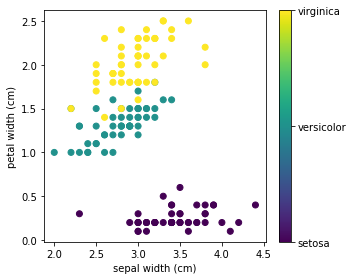

In [178]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Usando SVC para classificar as Iris

In [179]:
#from sklearn.linear_model import LinearRegression

#model = LinearRegression(copy_X=True, normalize=True)
from sklearn.svm import SVC

model = SVC(C=1)


In [187]:
## Ajustando dados

dici = {'setosa': 0, 
        'versicolor': 1, 
        'virginica': 2}

X = pd.DataFrame(df_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = df_iris['name'].map(dici)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.fit(X_train,y_train)

SVC(C=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


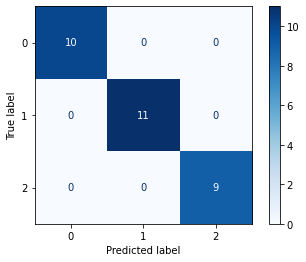

In [189]:
y_result = model.predict(X_test)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_result, cmap=plt.cm.Blues)